In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fuel-prices/fuel-prices.csv


# Data Check

In [2]:
data = pd.read_csv("/kaggle/input/fuel-prices/fuel-prices.csv", names=["Date", "Name", "Price"], sep=";")
display(data)
display(data.info())

,Date,Name,Price
0,2022-06-18T14:40:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
1,2022-06-18T15:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
2,2022-06-18T16:00:02+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
3,2022-06-18T17:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
4,2022-06-18T18:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
...,...,...,...
2393,2022-09-26T07:30:01+02:00,AVIA XPress TS Raml,1.879
2394,2022-09-26T08:30:01+02:00,AVIA XPress TS Raml,1.879
2395,2022-09-26T09:30:02+02:00,AVIA XPress TS Raml,1.873
2396,2022-09-26T10:30:02+02:00,AVIA XPress TS Raml,1.873


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2398 non-null   object 
 1   Name    2397 non-null   object 
 2   Price   2395 non-null   float64
dtypes: float64(1), object(2)
memory usage: 56.3+ KB


None

In [3]:
data["Date"] = pd.to_datetime(data["Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype                                
---  ------  --------------  -----                                
 0   Date    2398 non-null   datetime64[ns, pytz.FixedOffset(120)]
 1   Name    2397 non-null   object                               
 2   Price   2395 non-null   float64                              
dtypes: datetime64[ns, pytz.FixedOffset(120)](1), float64(1), object(1)
memory usage: 56.3+ KB


In [4]:
data[data.isnull().any(axis=1)]

,Date,Name,Price
22,2022-06-19 12:00:01+02:00,OMV - Engerwitzdorf Freistädter Straße 50,NaN
46,2022-06-20 12:00:02+02:00,OMV - Engerwitzdorf Freistädter Straße 50,NaN
914,2022-07-26 16:30:18+02:00,NaN,NaN


# Drop faulty rows

In [5]:
data.drop([22, 46, 914], inplace=True, axis="index")

In [6]:
data.isnull().sum()

Date     0
Name     0
Price    0
dtype: int64

# Extract more information out of "Date" column

In [7]:
data["Day Of Week"] = data["Date"].dt.day_name()
data["Month"] = data["Date"].dt.month_name()
data["Week Of Year"] = data["Date"].dt.isocalendar().week
data["Day Of Year"] = data["Date"].dt.dayofyear
data["Year"] = data["Date"].dt.year
data

,Date,Name,Price,Day Of Week,Month,Week Of Year,Day Of Year,Year
0,2022-06-18 14:40:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
1,2022-06-18 15:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
2,2022-06-18 16:00:02+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
3,2022-06-18 17:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
4,2022-06-18 18:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
...,...,...,...,...,...,...,...,...
2393,2022-09-26 07:30:01+02:00,AVIA XPress TS Raml,1.879,Monday,September,39,269,2022
2394,2022-09-26 08:30:01+02:00,AVIA XPress TS Raml,1.879,Monday,September,39,269,2022
2395,2022-09-26 09:30:02+02:00,AVIA XPress TS Raml,1.873,Monday,September,39,269,2022
2396,2022-09-26 10:30:02+02:00,AVIA XPress TS Raml,1.873,Monday,September,39,269,2022


# Overall plot

<AxesSubplot:xlabel='Date', ylabel='Price'>

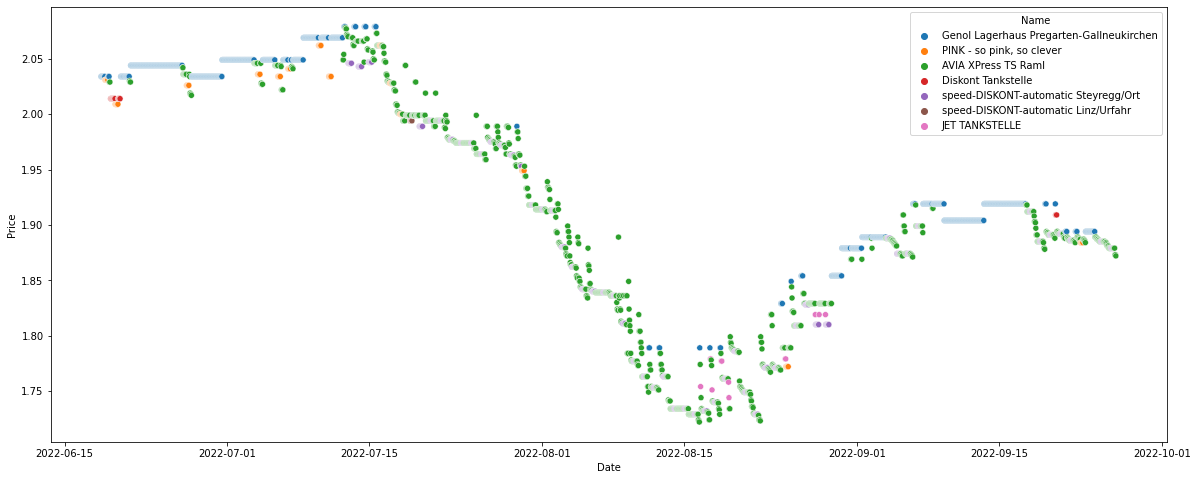

In [8]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data, x="Date", y="Price", hue="Name")

<AxesSubplot:xlabel='Date', ylabel='Price'>

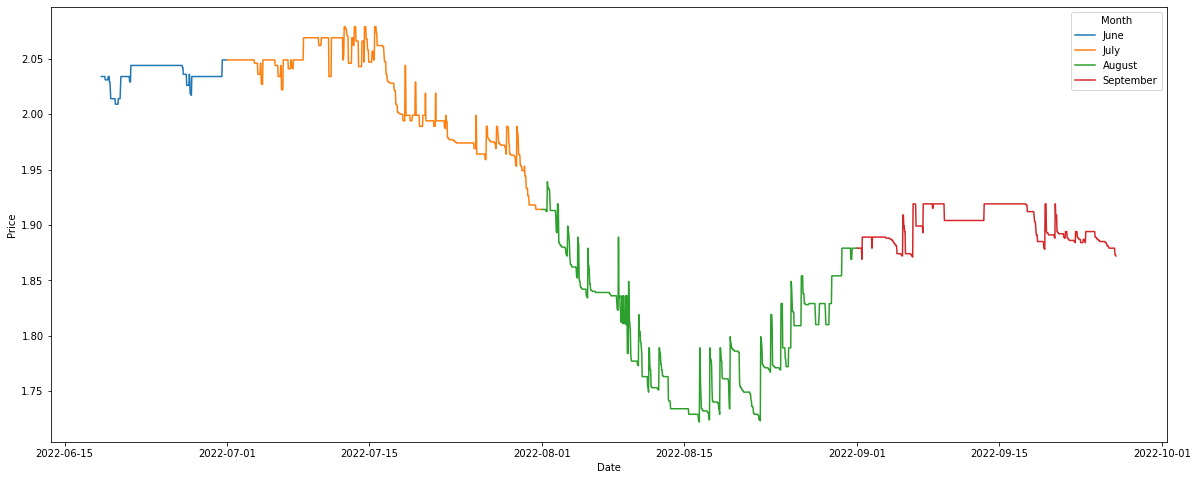

In [9]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data, x="Date", y="Price", hue="Month")

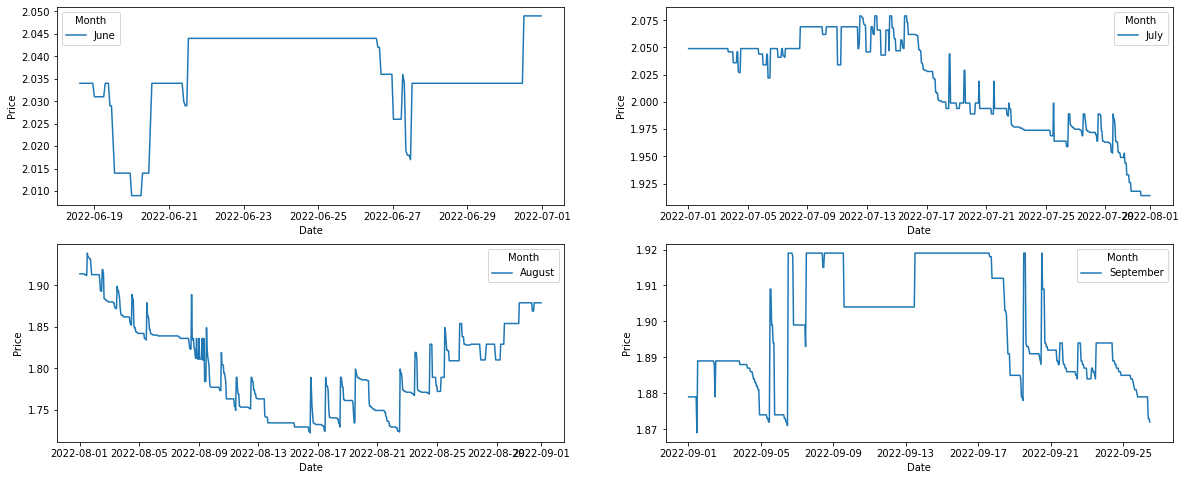

In [10]:
fig, axs = plt.subplots(2,2,figsize=(20,8))
months = [ 
    ((0,0), "June"), 
    ((0,1), "July"), 
    ((1,0), "August"), 
    ((1,1), "September")
]

for pos, month in months:
    sns.lineplot(data=data[data["Month"] == month], x="Date", y="Price", hue="Month", ax=axs[pos])

# Min price for each day

In [11]:
min_price_day_of_year = data.loc[data.groupby(["Day Of Year"]).Price.idxmin()]
min_price_day_of_year

,Date,Name,Price,Day Of Week,Month,Week Of Year,Day Of Year,Year
0,2022-06-18 14:40:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
23,2022-06-19 13:00:02+02:00,Diskont Tankstelle,2.014,Sunday,June,24,170,2022
34,2022-06-20 00:00:02+02:00,"PINK - so pink, so clever",2.009,Monday,June,25,171,2022
68,2022-06-21 10:30:02+02:00,AVIA XPress TS Raml,2.029,Tuesday,June,25,172,2022
82,2022-06-22 00:30:02+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.044,Wednesday,June,25,173,2022
...,...,...,...,...,...,...,...,...
2301,2022-09-22 11:30:03+02:00,AVIA XPress TS Raml,1.884,Thursday,September,38,265,2022
2314,2022-09-23 00:30:01+02:00,"PINK - so pink, so clever",1.884,Friday,September,38,266,2022
2359,2022-09-24 21:30:02+02:00,AVIA XPress TS Raml,1.885,Saturday,September,38,267,2022
2381,2022-09-25 19:30:01+02:00,AVIA XPress TS Raml,1.879,Sunday,September,38,268,2022


# Max price for each day

In [12]:
max_price_day_of_year = data.loc[data.groupby(["Day Of Year"]).Price.idxmax()]
max_price_day_of_year

,Date,Name,Price,Day Of Week,Month,Week Of Year,Day Of Year,Year
0,2022-06-18 14:40:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,June,24,169,2022
17,2022-06-19 07:00:02+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Sunday,June,24,170,2022
47,2022-06-20 13:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Monday,June,25,171,2022
70,2022-06-21 12:30:02+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.044,Tuesday,June,25,172,2022
82,2022-06-22 00:30:02+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.044,Wednesday,June,25,173,2022
...,...,...,...,...,...,...,...,...
2302,2022-09-22 12:30:02+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,1.894,Thursday,September,38,265,2022
2326,2022-09-23 12:30:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,1.894,Friday,September,38,266,2022
2338,2022-09-24 00:30:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,1.894,Saturday,September,38,267,2022
2362,2022-09-25 00:30:01+02:00,speed-DISKONT-automatic Steyregg/Ort,1.885,Sunday,September,38,268,2022


# Price each incl. margin

<AxesSubplot:xlabel='Day Of Year', ylabel='Price'>

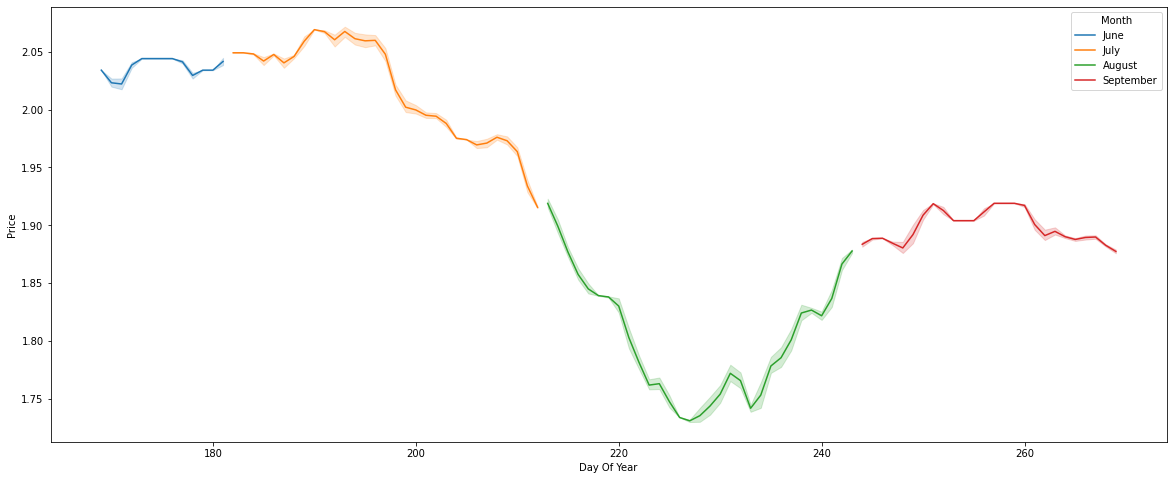

In [13]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data, x="Day Of Year", y="Price", hue="Month")

# Min price per week

In [14]:
min_price_week_of_year = data.loc[data.groupby(["Week Of Year"]).Price.idxmin()]
min_price_week_of_year

,Date,Name,Price,Day Of Week,Month,Week Of Year,Day Of Year,Year
23,2022-06-19 13:00:02+02:00,Diskont Tankstelle,2.014,Sunday,June,24,170,2022
34,2022-06-20 00:00:02+02:00,"PINK - so pink, so clever",2.009,Monday,June,25,171,2022
213,2022-06-27 11:30:01+02:00,AVIA XPress TS Raml,2.017,Monday,June,26,178,2022
426,2022-07-06 08:30:01+02:00,AVIA XPress TS Raml,2.022,Wednesday,July,27,187,2022
702,2022-07-17 20:30:02+02:00,AVIA XPress TS Raml,2.001,Sunday,July,28,198,2022
839,2022-07-23 13:30:02+02:00,AVIA XPress TS Raml,1.974,Saturday,July,29,204,2022
1027,2022-07-31 09:30:01+02:00,AVIA XPress TS Raml,1.914,Sunday,July,30,212,2022
1149,2022-08-05 11:30:01+02:00,AVIA XPress TS Raml,1.834,Friday,August,31,217,2022
1345,2022-08-13 15:30:01+02:00,AVIA XPress TS Raml,1.734,Saturday,August,32,225,2022
1413,2022-08-16 11:30:01+02:00,AVIA XPress TS Raml,1.722,Tuesday,August,33,228,2022


<AxesSubplot:xlabel='Week Of Year', ylabel='Price'>

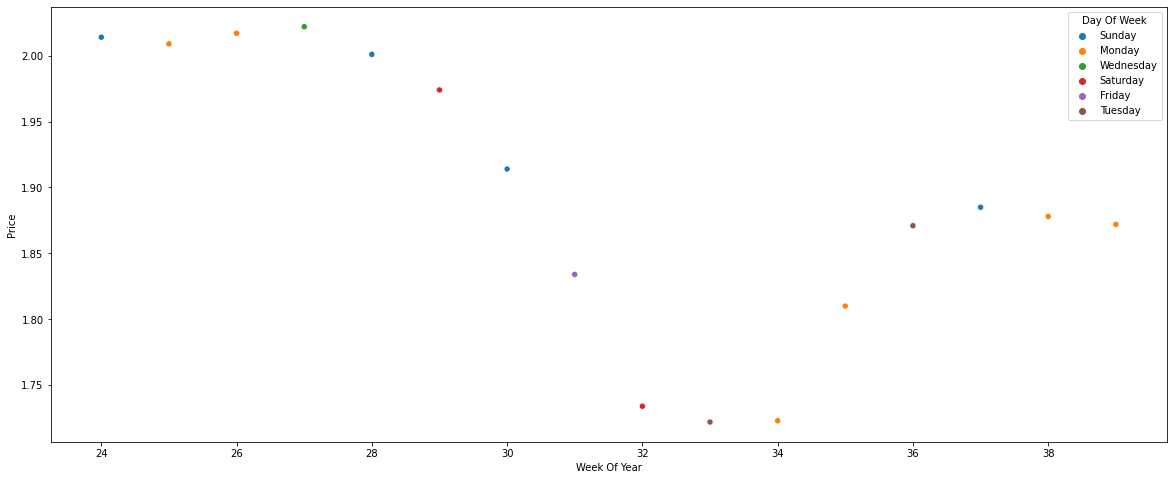

In [15]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=min_price_week_of_year, x="Week Of Year", y="Price", hue="Day Of Week")

In [16]:
min_price_week_of_year.groupby(["Day Of Week"])["Price"].count().sort_values().reset_index(name='Counts')


,Day Of Week,Counts
0,Friday,1
1,Wednesday,1
2,Saturday,2
3,Tuesday,2
4,Sunday,4
5,Monday,6


In [17]:
mean_price_day_of_week = data.groupby(["Day Of Week"]).mean()["Price"].to_frame().reindex([ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
mean_price_day_of_week

,Price
Day Of Week,
Monday,1.917594
Tuesday,1.924060
Wednesday,1.923854
Thursday,1.924390
Friday,1.926973
Saturday,1.924552
Sunday,1.919290


<AxesSubplot:xlabel='Day Of Week', ylabel='Price'>

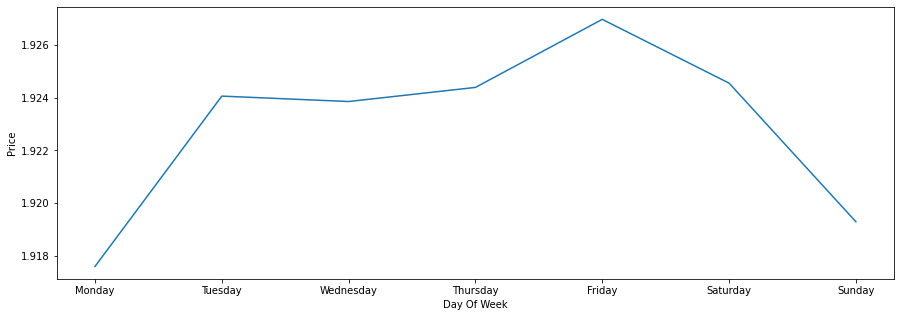

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(data=mean_price_day_of_week, x="Day Of Week", y="Price")